# Olympics 1952-2014, looking at some world trends

*Author: Ximena Leyva Peralta*\
*"Analyze Data with Python" Codecademy course, final project*\
*August 20th, 2024*

## Introduction

Olympic performance worldwide is far from uniform. The final country ranking after every Olympics has shown some pretty consistent top players. While individual merit and performance must be recognized, an athlete's country or continent of origin plays a significant role. This project aims to explore and visualize trends in Olympic performance across multiple countries and to run some statistical tests on hypotheses derived from these trends.\
\
My personal goal with this project is to practice handling datasets, performing data cleaning and preparation, creating data visualizations, formulating testable hypotheses based on the data, performing statistical tests on them, and presenting the results. I will focus on testing statistical hypothesis, but will not aim to provide explanations for the observed results.
<br>
<br><br>
<details>
    <summary style="display:list-item;">Acknowledgements</summary>
    <em>I must credit <a href="https://www.youtube.com/watch?v=kuvKukJNmzI">this Hank Green video</a> (which I watched the morning I started this project) for giving me the idea of focusing on the Olympics.<br>
        And <a href="https://www.youtube.com/watch?v=uL5HALThICw">the sequel</a> to that video that I just watched as I'm writing up this report, for reminding me that data is kind of complicated.
        </em>
    </details>

***

## About the dataset

I obtained the initial dataset from [this Kaggle entry](https://www.kaggle.com/datasets/the-guardian/olympic-games), which credits the IOC Research and Reference Service and The Guardian's Datablog. The final dataset is provided in `dataset/directory.csv`.

#### Important Characteristics
* Countries with 0 Olympic medals and no reliable GDP per capita or population information were not included in the final analysis.
* Summer and winter Olympics were combined to calculate medal totals.
* GDP per capita is given in USD dollars.
* I chose the year 1952 as a rough initial point that minimizes disruptions to the Olympics.

***

## Data Initialization

#### Setup

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, f_oneway, binomtest
import pycountry_convert as pc
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# display charts correctly
%matplotlib inline

In [3]:
# MAIN dataset
country_olympics = pd.read_csv('dataset/dictionary.csv')
country_olympics.head()

,Country,Code,Population,GDP per Capita,Total medals,Continent,Total gold,Total silver,Total bronze,Medals per capita,Total medal val,Avg medal val
0,United States,USA,321000000.0,56115.718430,3605,NAm,1638,1120,847,0.000011,8001,2.219417
1,Australia,AUS,23800000.0,56310.962990,1155,OC,304,386,465,0.000049,2149,1.860606
2,Germany,GER,81400000.0,41313.313990,1152,EU,415,341,396,0.000014,2323,2.016493
3,Italy,ITA,60800000.0,29957.804320,1039,EU,323,331,385,0.000017,2016,1.940327
4,Russia,RUS,144000000.0,9092.580536,1031,EU,333,328,370,0.000007,2025,1.964113



<details><summary style="display:list-item;">Here's a quick summary of the columns</summary>
     
- **Country**: Country name
- **Code**: 3-letter code for country
- **Population**: Latest estimate of country's population
- **GDP per Capita**: Latest estimate of country's GDP per capita (USD)
- **Total medals**: Total medals won between 1952-2014 across all events
- **Continent**: Code for country's continent (see `continent_names` below for conversion table)
- **Total gold**: Total gold medals won between 1952-2014 across all events
- **Total silver**: Total silver medals won between 1952-2014 across all events
- **Total bronze**: Total bronze medals won between 1952-2014 across all events
- **Medals per capita**: Calculated as Total medals/Population
- **Total medal val**: Total value of country's medals calculated by assigning gold=3, silver=2, bronze=1
- **Avg medal val**: Calculated as Total medal val/Total medals

#### Formatting for graphics

In [4]:
continent_colors = {'NAm': 'blue',
                    'SA': 'orange',
                    'EU': 'purple',
                    'AF': 'pink',
                    'AS': 'red',
                    'OC': 'green'}
continent_names = {'NAm': 'North America',
                    'SA': 'South America',
                    'EU': 'Europe',
                    'AF': 'Africa',
                    'AS': 'Asia',
                    'OC': 'Oceania'}

In [5]:
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=continent_colors[code], label=continent_names[code]) 
                  for code in continent_colors]

country_olympics['Color'] = country_olympics['Continent'].map(continent_colors)


****

## World total medal distributions
* What is the distribution of total medals won per country?
* What about for gold? silver? bronze?

In [6]:
# Distributions of total medals per country
world_medals = country_olympics['Total medals']
world_gold = country_olympics['Total gold']
world_silver = country_olympics['Total silver']
world_bronze = country_olympics['Total bronze']

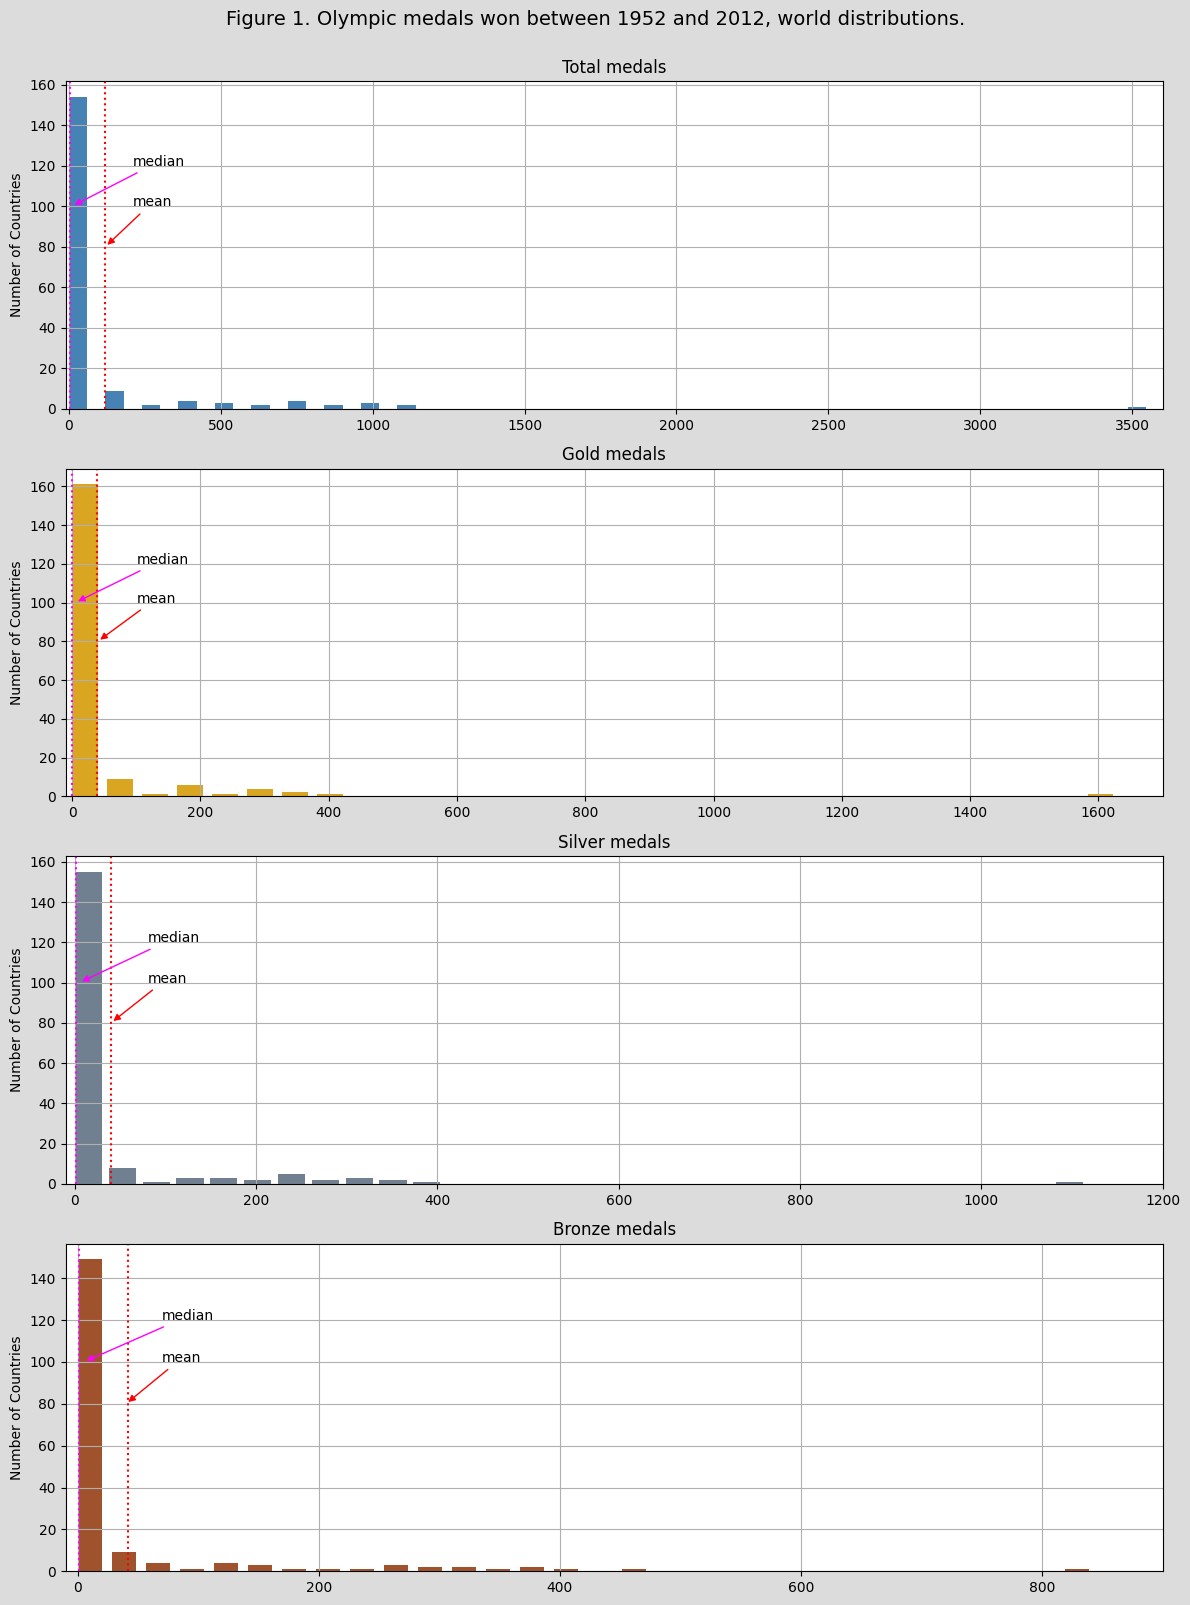

In [45]:
fig = plt.figure(figsize=(12,16), facecolor='gainsboro') 
fig.suptitle('Figure 1. Olympic medals won between 1952 and 2012, world distributions.',fontsize=14, y=1)
fig.subplots_adjust(top=0.85, hspace=0.5)

plt.subplot(4,1,1)
plt.title('Total medals')
plt.hist(world_medals, bins=30, width=60, color='steelblue')
plt.xlim(-10, 3600)
plt.ylabel('Number of Countries')
plt.grid(True)
plt.axvline(x=np.mean(world_medals), linestyle=':', color='red')
plt.axvline(x=np.median(world_medals), linestyle=':', color='magenta')
plt.annotate('mean', xy=(120,80), xytext=(210,100), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='red'))
plt.annotate('median', xy=(10,100), xytext=(210,120), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='magenta'))


plt.subplot(4,1,2)
plt.title('Gold medals')
plt.hist(world_gold, bins=30, width=40, color='goldenrod')
plt.xlim(-10, 1700)
plt.ylabel('Number of Countries')
plt.grid(True)
plt.axvline(x=np.mean(world_gold), linestyle=':', color='red')
plt.axvline(x=np.median(world_gold), linestyle=':', color='fuchsia')
plt.annotate('mean', xy=(40,80), xytext=(100,100), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='red'))
plt.annotate('median', xy=(5,100), xytext=(100,120), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='magenta'))

plt.subplot(4,1,3)
plt.title('Silver medals')
plt.hist(world_silver, bins=30, width=30, color='slategray')
plt.xlim(-10, 1200)
plt.ylabel('Number of Countries')
plt.grid(True)
plt.axvline(x=np.mean(world_silver), linestyle=':', color='red')
plt.axvline(x=np.median(world_silver), linestyle=':', color='fuchsia')
plt.annotate('mean', xy=(40,80), xytext=(80,100), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='red'))
plt.annotate('median', xy=(5,100), xytext=(80,120), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='magenta'))

plt.subplot(4,1,4)
plt.title('Bronze medals')
plt.hist(world_bronze, bins=30, width=20, color='sienna')
plt.xlim(-10, 900)
plt.ylabel('Number of Countries')
plt.grid(True)
plt.axvline(x=np.mean(world_bronze), linestyle=':', color='red')
plt.axvline(x=np.median(world_bronze), linestyle=':', color='fuchsia')
plt.annotate('mean', xy=(40,80), xytext=(70,100), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='red'))
plt.annotate('median', xy=(5,100), xytext=(70,120), fontsize=10, color='black', arrowprops=dict(arrowstyle= '-|>', color='magenta'))

plt.tight_layout(h_pad=1)
plt.show()

### Comments on Fig. 1
* The medal distributions are heavily right-skewed. The distributions are highly asymmetrical with a mean greater than the median.
* There is an overwhelming majority of countries that have won very few or no medals at all.
* There is at least one point that jumps out as an outlier at around 3500 total medals. This point corresponds to the US.
* The US has won more gold medals (around 1600) than silver (around 1100) or bronze (around 850). This causes the distribution of gold medals to appear more spread out than that of silver or bronze. However, the rest of the data points, seem to have a consistent spread across all medal types

In [8]:
print(f"Medal type\tMedian\tMean\t\t\tStandard deviation")
print(f"Total\t\t{np.median(world_medals)}\t{np.mean(world_medals)}\t{np.std(world_medals)}")
print(f"Gold\t\t{np.median(world_gold)}\t{np.mean(world_gold)}\t{np.std(world_gold)}")
print(f"Silver\t\t{np.median(world_silver)}\t{np.mean(world_silver)}\t{np.std(world_silver)}")
print(f"Bronze\t\t{np.median(world_bronze)}\t{np.mean(world_bronze)}\t{np.std(world_bronze)}")

Medal type	Median	Mean			Standard deviation
Total		3.0	119.51075268817205	351.73939887804636
Gold		0.0	38.505376344086024	140.01187535317186
Silver		1.0	39.45161290322581	113.05627261221925
Bronze		1.0	41.553763440860216	106.03235361302809


### Hypothesis 1:The gold, silver, and bronze medal distributions have significantly different means. <span style="color:red">(not supported)</span>

We should perform an ANOVA test since we have more than two numerical datasets.\
\
**Null hypothesis:** The gold, silver, and bronze medals distributions have the same mean. Differences are caused by randomness.\
**P-value for significance:** 0.05

In [9]:
_, pval1 = f_oneway(world_gold, world_silver,world_bronze)
print(f"Hypothesis 1 p-value = {pval1}")

Hypothesis 1 p-value = 0.969506395189242


**Results:** the p-value is greater than 0.05 so <ins>the null hypothesis cannot be rejected.</ins> This means that the difference in average gold, silver, and bronze medals are most likely only due to randomness.

<span style="color:#b87502">DISCLAIMER: I chose to perform this test without checking for normality or homogeneity of the datasets because I wanted to get a rough estimate. 
    <br><br>We can now check for homogeneity by comparing the STDs (standard deviations) of the datasets to check the validity of our analysis. We do this by computing STD ratios between any two pairs and checking that they fall within 0.9 and 1.1 (a 10% difference).</span>

In [10]:
print(f"Ratio of Gold to Silver std: {np.std(world_gold)/np.std(world_silver):.2f}")
print(f"Ratio of Gold to Bronze std: {np.std(world_gold)/np.std(world_bronze):.2f}")
print(f"Ratio of Bronze to Silver std: {np.std(world_bronze)/np.std(world_silver):.2f})")

Ratio of Gold to Silver std: 1.24
Ratio of Gold to Bronze std: 1.32
Ratio of Bronze to Silver std: 0.94)


<span style="color:#b87502"> The STDs of the Gold-Silver and Gold-Bronze pairs are more different than the threshold we set. However, they are not incredibly different so our conclusion from the test is still most likely true. <br><br>
I decided to NOT perform other statistical tests for practical reasons. However, a test that does not assume normality and homogeneity, such as the Kruskal-Wallis H test, could be performed to obtain more satisfactory results.</span>

### Hypothesis 2: The probability of a country winning at least one gold medal in an Olympic Games can be modeled as 50%. <span style="color:green">(supported)</span>
We can test for this using a binomial test. A probability of 50% is a rough estimate.\
\
**Null hypothesis:** The probability that a country wins at least one gold medal in an Olympics game is 50%. In this case, our actual hypothesis is the same as the null needed for the test.\
**P-value for significance:** 0.05\
\
Our number of trials will be the total number of countries. Our number of successes will be the total number of countries that have won at least one gold.

In [11]:
at_least_one_gold = country_olympics[country_olympics['Total gold'] >= 1]['Country'].count()
total_countries = country_olympics['Country'].count()
print(f"Proportion of countries that have won at least one gold medal: {at_least_one_gold/total_countries}")

Proportion of countries that have won at least one gold medal: 0.45698924731182794


In [12]:
binom2 = binomtest(at_least_one_gold, total_countries, 0.5)
print(f"Hypothesis 2 p-value = {binom2.pvalue}")

Hypothesis 2 p-value = 0.27135236737309887


**Results:** <ins>We cannot reject the null hypothesis.</ins> The observed proportion of countries winning gold medals is statistically consistent with the hypothesized probability of 50%.

### Hypothesis 3: A country's continent significantly influences its likelihood of winning at least one gold medal. <span style="color:green">(supported)</span>
Based on a quick inspection of the dataset, it looks like there are some continents with more countries that have gold medals. We can write out the data in a contingency table and then perform a chi square test.\
\
**Null hypothesis:** There is no association between the amount of countries that have won at least one gold medal and the continent.\
**P-value for sigificance:** 0.05

In [13]:
country_olympics['Won Gold'] = country_olympics['Total gold'] > 0
contingency_table = pd.crosstab(country_olympics['Continent'], country_olympics['Won Gold'])
contingency_table

Won Gold,False,True
Continent,,
AF,38,13
AS,28,21
EU,9,31
NAm,14,11
OC,7,2
SA,5,7


In [14]:
_, pval3, _, _ = chi2_contingency(contingency_table)
print(f"Hypothesis 3 p-value: {pval3}")

Hypothesis 3 p-value: 4.2522624904539895e-05


**Results:** <ins>We reject the null hypothesis!</ins> There is a clear dependence on the number of countries that have won a gold medal and the continent of origin.

***

## Medals distribution per continent
Do the total medals distributions look the same across continents?\
Let's start with some visualizations!

In [15]:
europe_medals = country_olympics[country_olympics['Continent'] == 'EU']['Total medals']
asia_medals = country_olympics[country_olympics['Continent'] == 'AS']['Total medals']
africa_medals = country_olympics[country_olympics['Continent'] == 'AF']['Total medals']
oceania_medals = country_olympics[country_olympics['Continent'] == 'OC']['Total medals']
south_america_medals = country_olympics[country_olympics['Continent'] == 'SA']['Total medals']
north_america_medals = country_olympics[country_olympics['Continent'] == 'NAm']['Total medals']
north_america_medals_no_usa = country_olympics[(country_olympics['Code'] != 'USA') & (country_olympics['Continent'] == 'NAm')]['Total medals']

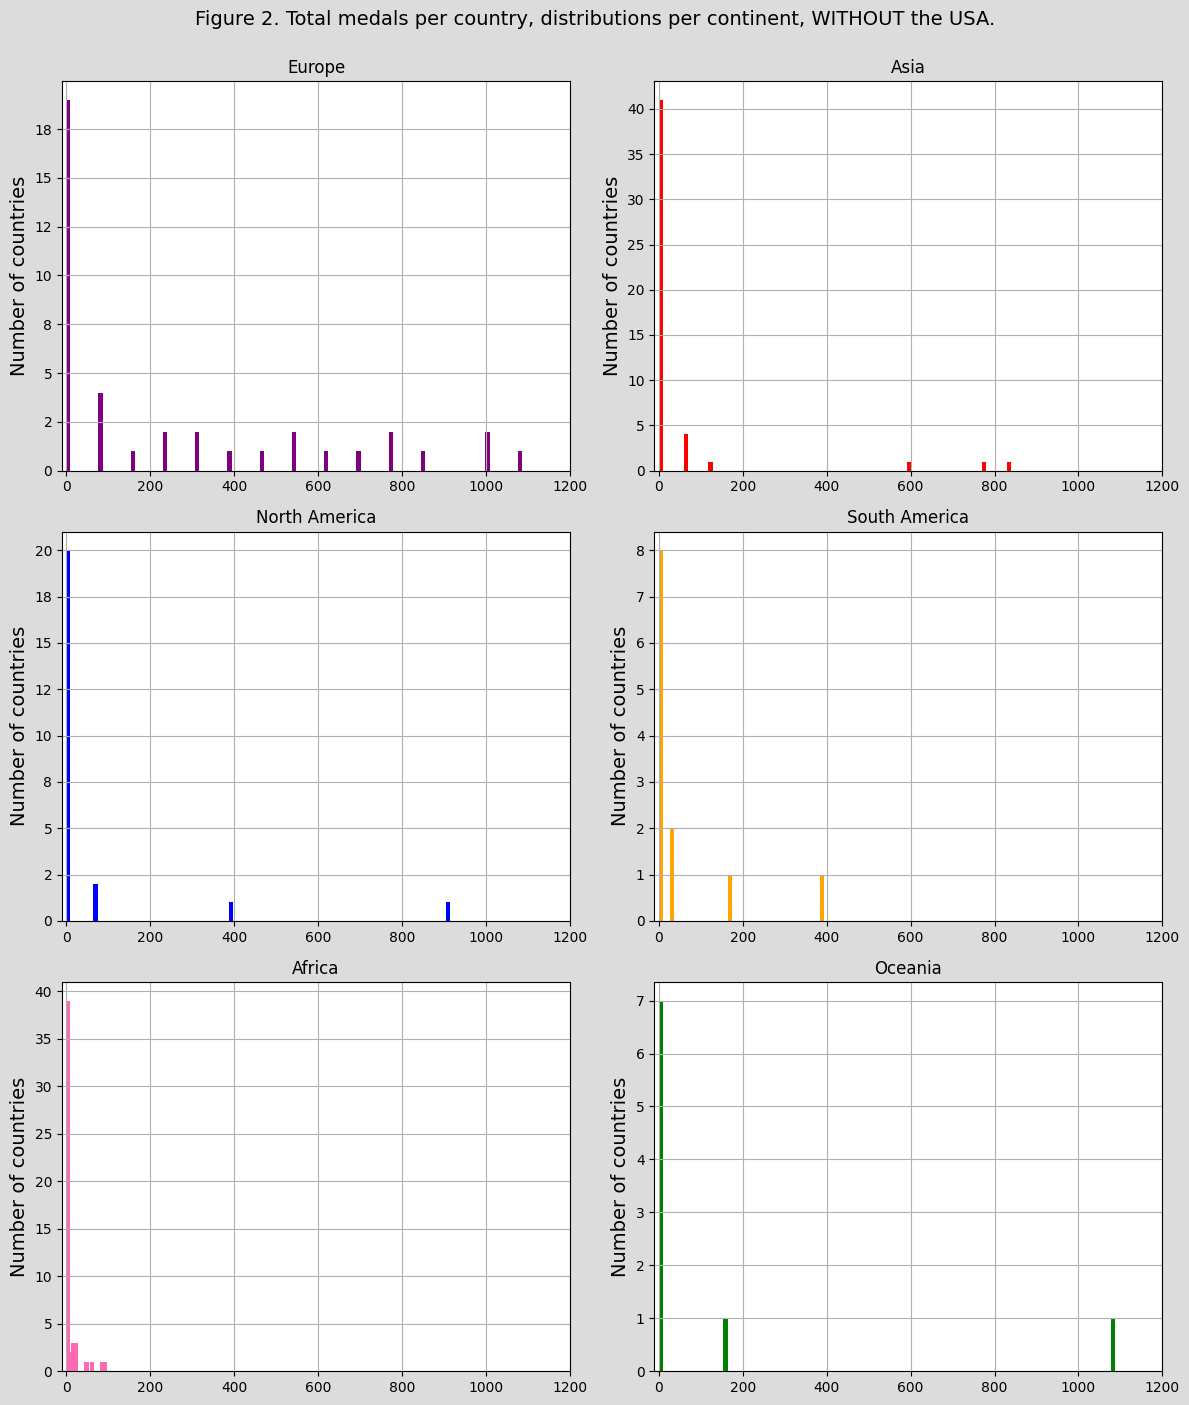

In [47]:
fig = plt.figure(figsize=(12,14), tight_layout=True, facecolor='gainsboro') 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Figure 2. Total medals per country, distributions per continent, WITHOUT the USA.', fontsize=14, y=1)

plt.subplot(3,2,1)
plt.hist(europe_medals, bins=15, width=10, color='purple')
plt.title('Europe')
plt.xlim(-10,1200)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,2)
plt.hist(asia_medals, bins=15, width=10, color='red')
plt.title('Asia')
plt.xlim(-10,1200)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,3)
plt.hist(north_america_medals_no_usa, bins=15, width=10, color='blue')
plt.title('North America')
plt.xlim(-10,1200)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,4)
plt.hist(south_america_medals, bins=15, width=10, color='orange')
plt.title('South America')
plt.xlim(-10,1200)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,5)
plt.hist(africa_medals, bins=15, width=10, color='hotpink')
plt.title('Africa')
plt.xlim(-10,1200)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,6)
plt.hist(oceania_medals, bins=15, width=10, color='green')
plt.title('Oceania')
plt.xlim(-10,1200)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.show()

### Comments on Fig. 2
* We can visually see that the spread in these distributions is not the same. 
* Europe has a more uniform spread than other continents. 
* Africa overall has a much lower performance across the board.
* All other continents, have some countries that do particularly well and many that don't.
* The range of total medals changes between continents.
* Except for Europe, the continents follow a similar trend to the world distribution seen in figure 1.

### Hypothesis 4: European countries on average have won more medals than the global average. <span style="color:green">(supported)</span>
Based on the last observation from figure 2, I wanted to quantify how different Europe is to the rest of the world. Because of the nature of the hypothesis, we can run a 1-sample t-test where Europe is a sample and the world is the population.\
\
**Null hypothesis:** The average total medals per country in Europe is the same as the worldwide average.\
**P-value for significance:** 0.05\
\
We first compare the STDs to confirm we can run our test

In [17]:
world_mean = np.mean(world_medals)
europe_std = np.std(europe_medals)
world_std = np.std(world_medals)

print(f"\tMean\t\t\tStandard deviation")
print(f"Europe\t{np.mean(europe_medals)}\t\t\t{europe_std}")
print(f"World\t{world_mean}\t{world_std}")

print(f"\nRatio between STDs: {world_std/europe_std}")

	Mean			Standard deviation
Europe	286.025			347.98243400349963
World	119.51075268817205	351.73939887804636

Ratio between STDs: 1.0107964210472444


They are within range, so we can perform our test!

In [18]:
_, pval4 = ttest_1samp(europe_medals, world_mean)
print(f"Hypothesis 4 p-value = {pval4}")

Hypothesis 4 p-value = 0.004834344208519806


**Results:** P-value below threshold, <ins>null hypothesis rejected!</ins> The average medals per country in Europe is significantly higher than the average worldwide.

### Hypothesis 5: European countries have won more medals per capita than the global average. <span style="color:orange">(inconclusive)</span>
Since the average total medals is different in Europe, I wondered if this would also be the case for medals per capita. I.e. I want to see if on average, a European wins more medals than a random person.\
\
**Null hypothesis:** The average medals per capita in Europe is the same as the worldwide average.\
**P-value for significance:** 0.05\
\
We first compare the STDs to confirm we can run our test

In [19]:
europe_medals_per_capita = country_olympics[country_olympics['Continent'] == 'EU']['Medals per capita']
world_medals_per_capita = country_olympics['Medals per capita']

In [20]:
print(f"\tMean\t\t\tStandard deviation")
print(f"Europe\t{np.mean(europe_medals_per_capita)}\t\t{np.std(europe_medals_per_capita)}")
print(f"World\t{np.mean(world_medals_per_capita)}\t{np.std(world_medals_per_capita)}")

print(f"\nRatio between Europe-World STDs: {np.std(europe_medals_per_capita)/np.std(world_medals_per_capita)}")
print(f"Ratio between Europe-World means: {np.mean(europe_medals_per_capita)/np.mean(world_medals_per_capita)}")

	Mean			Standard deviation
Europe	2.831725e-05		4.382665186490407e-05
World	8.411420967741936e-06	2.4298761235539658e-05

Ratio between Europe-World STDs: 1.8036578671674295
Ratio between Europe-World means: 3.366523933185314


Unfortunately, the STDs of the datasets are considerably different to perform the test.\
\
**Results:** <ins>Cannot perform the test reliably.</ins> *However*, we can see that the average medals per capita in Europe is 3.4 times that of the world average.

### Hypothesis 6: The average number of Olympic medals varies significantly across different continents. <span style="color:green">(supported)</span>
We visually noticed that the range of total medals per country changed between continents in figure 2. We can apply an ANOVA test to check if this variation is statistically significant\
\
**Null hypothesis:** The average number of total medals is the same across continents.\
**P-value for significance:** 0.05

In [21]:
_, pval6 = f_oneway(europe_medals, asia_medals, africa_medals, oceania_medals, north_america_medals, south_america_medals)
print(pval6)

0.0031792494991382024


**Results:** P-value below threshold, <ins>null hypothesis rejected!</ins> The average number of total medals does differ between some continents.\
\
We can now perform Tukey's range test to find which countries are different from each other. We again use **p-value for significance** = 0.05.

In [22]:
tukey6 = pairwise_tukeyhsd(endog=country_olympics['Total medals'],
                          groups=country_olympics['Continent'],
                          alpha=0.05)

print(tukey6.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
    AF     AS   53.7719  0.969 -142.3961 249.9399  False
    AF     EU  277.6132 0.0021   70.4957 484.7308   True
    AF    NAm  201.2682 0.1543  -38.1532 440.6897  False
    AF     OC  140.6993 0.8626 -213.8532 495.2519  False
    AF     SA   52.2549 0.9969 -262.3793 366.8891  False
    AS     EU  223.8413  0.028    14.874 432.8086   True
    AS    NAm  147.4963 0.4924   -93.527 388.5197  False
    AS     OC   86.9274 0.9813 -268.7088 442.5637  False
    AS     SA    -1.517    1.0 -317.3719 314.3379  False
    EU    NAm   -76.345  0.951 -326.3611 173.6711  False
    EU     OC -136.9139 0.8848 -498.7052 224.8774  False
    EU     SA -225.3583   0.34 -548.1278  97.4111  False
   NAm     OC  -60.5689 0.9974 -441.7747 320.6369  False
   NAm     SA -149.0133 0.8133 -493.4042 195.3775  False
    OC     SA  -88.4444 0.9917 

**Results:** We see that there is a significant difference between the distributions of Africa & Europe and between Asia & Europe. Let's look at the means and stds of these two pairs.

In [23]:
print(f"Mean comparison 1:")
print(f"Africa = {np.mean(africa_medals)}")
print(f"Europe = {np.mean(europe_medals)}")

Mean comparison 1:
Africa = 8.411764705882353
Europe = 286.025


In [24]:
print(f"Mean comparison 2:")
print(f"Asia = {np.mean(asia_medals)}")
print(f"Europe = {np.mean(europe_medals)}")

Mean comparison 2:
Asia = 62.183673469387756
Europe = 286.025


**Final comments:** I also expected there to be a statistically difference between Europe and South America. While Tukey's test shows a lower p-value of 0.34 for this pair compared to other pairs, it is still not low enough to reject the null hypothesis. This shows the importance of setting a threshold for significance before computing the test. Otherwise, we can introduce bias.

***

## Medals, GDP, and Population
* How are GDP and population correlated with medals?
* Is it consistent worldwide?

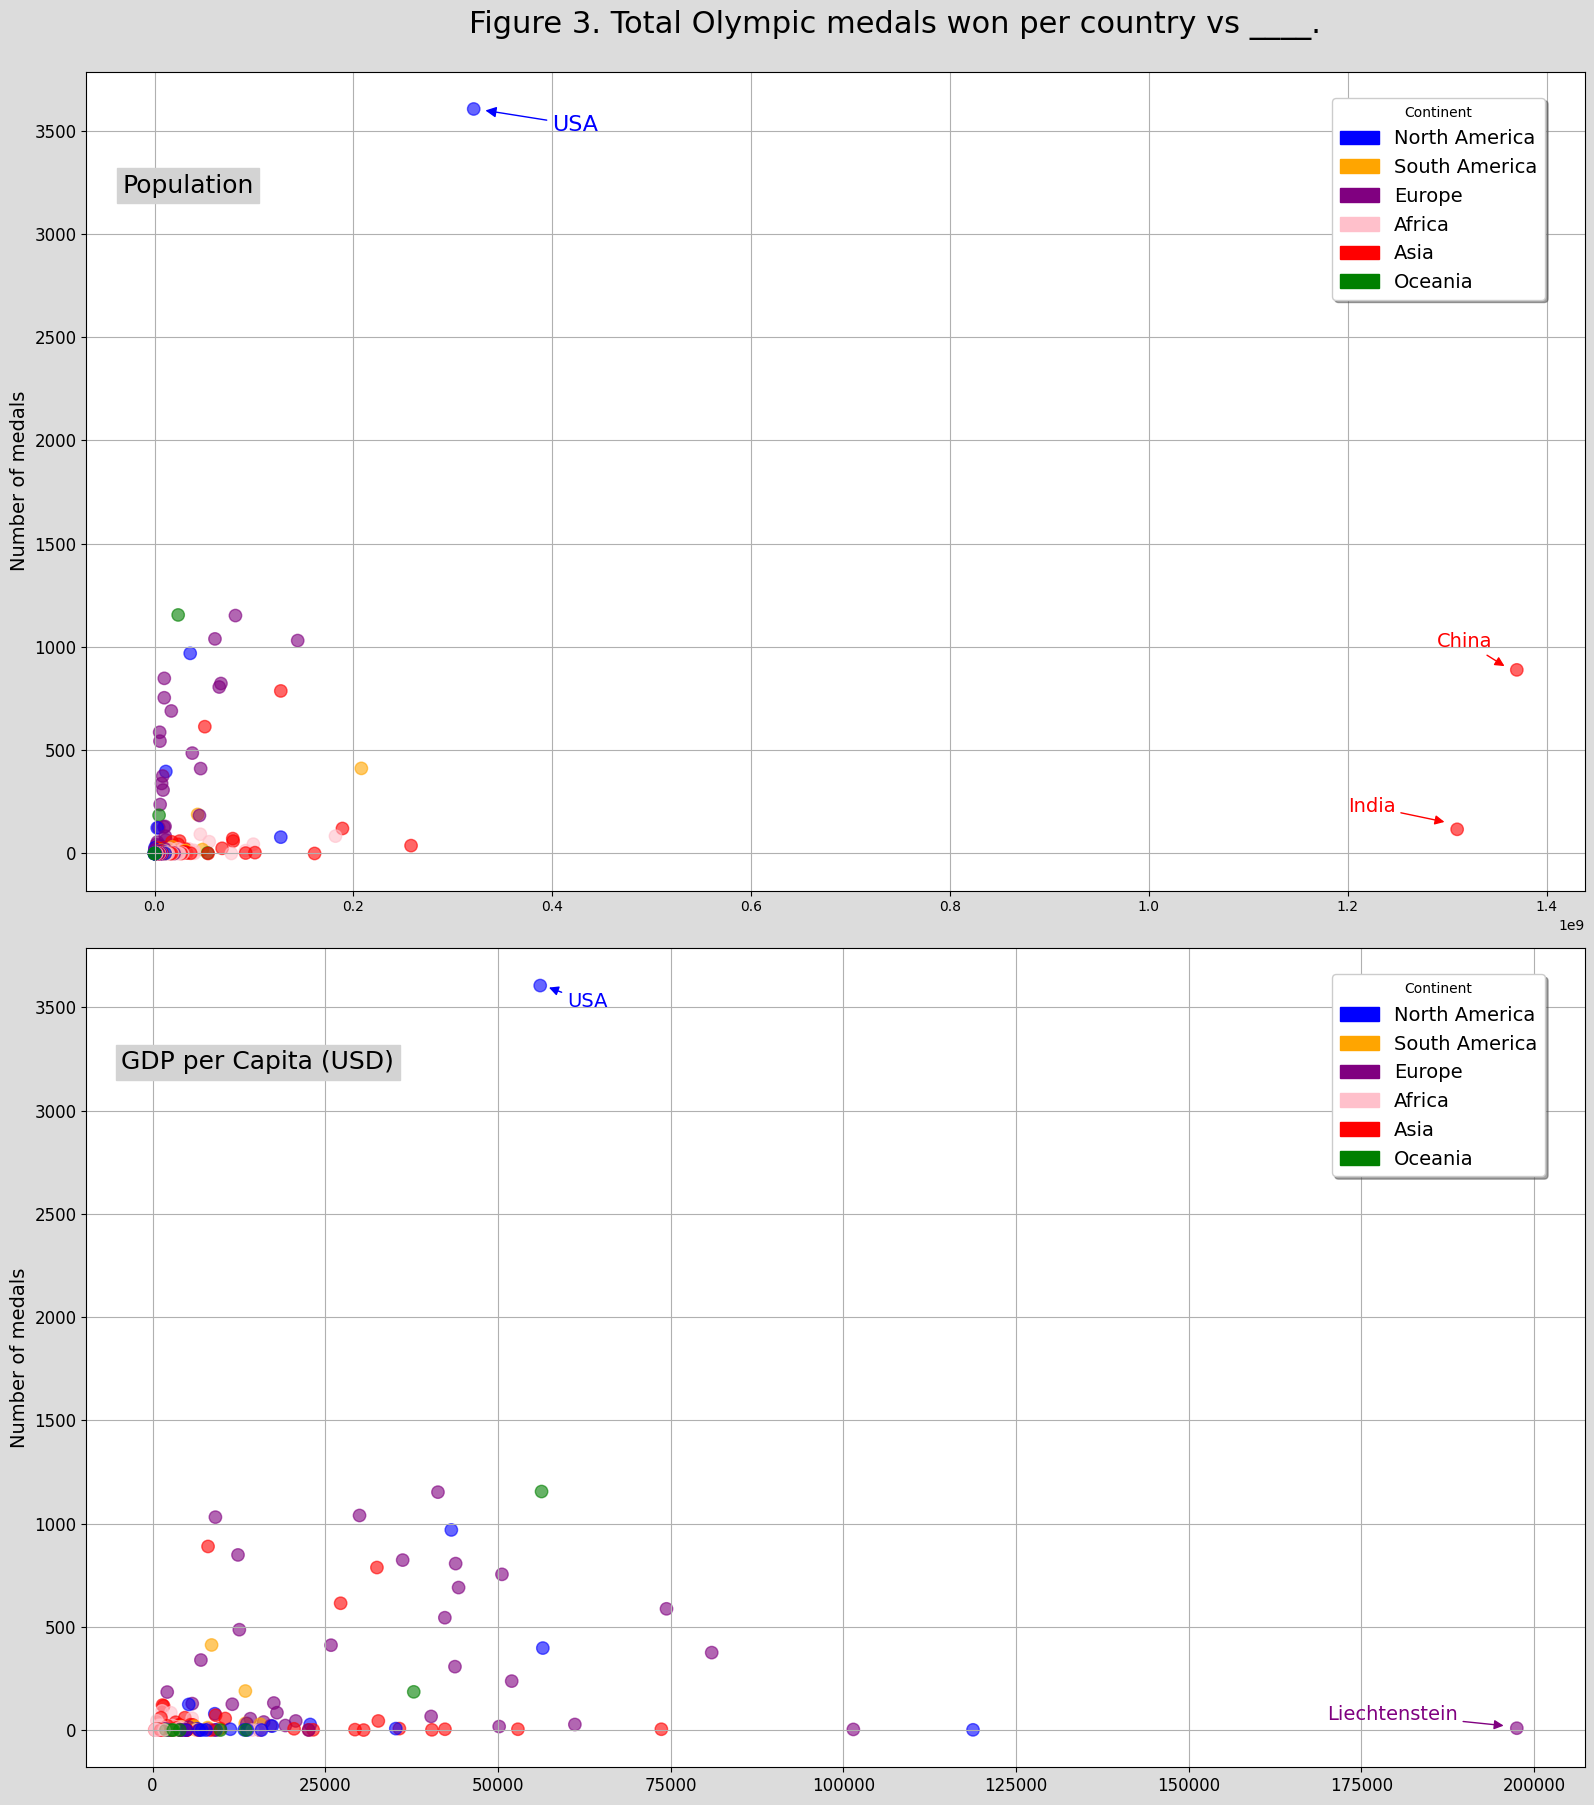

In [49]:
fig = plt.figure(figsize=(18,18), facecolor='gainsboro', tight_layout=True) 
fig.subplots_adjust(hspace=5)
fig.suptitle('Figure 3. Total Olympic medals won per country vs ____.', fontsize=22, y=1)


plt.subplot(2,1,1)
plt.scatter(country_olympics['Population'], world_medals, c=country_olympics['Color'], s=80, alpha=0.6)
#plt.title('Population & total medals')
plt.annotate('Population', (0.1e9, 3200), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.legend(handles=legend_handles, title='Continent', fontsize=14, shadow=True, bbox_to_anchor=(0.98,0.98))
plt.annotate('USA', xy=(0.33e9,3600), xytext=(0.4e9,3500), fontsize=16, color='blue', arrowprops=dict(arrowstyle= '-|>', color='blue'))
plt.annotate('China', xy=(1360000000,900), xytext=(1290000000,1000), fontsize=14, color='red', arrowprops=dict(arrowstyle= '-|>', color='red'))
plt.annotate('India', xy=(1300000000,150), xytext=(1200000000,200), fontsize=14, color='red', arrowprops=dict(arrowstyle= '-|>', color='red'))
plt.yticks(fontsize=12)
plt.grid(True)
plt.ylabel('Number of medals', fontsize=14)

plt.subplot(2,1,2)
plt.scatter(country_olympics['GDP per Capita'], world_medals, c=country_olympics['Color'], s=80, alpha=0.6)
plt.annotate('GDP per Capita (USD)', (35000, 3200), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.legend(handles=legend_handles, title='Continent', fontsize=14, shadow=True, bbox_to_anchor=(0.98,0.98))
plt.annotate('USA', xy=(57000,3600), xytext=(60000,3500), fontsize=14, color='blue', arrowprops=dict(arrowstyle= '-|>', color='blue'))
plt.annotate('Liechtenstein', xy=(196000,20), xytext=(170000,50), fontsize=14, color='purple', arrowprops=dict(arrowstyle= '-|>', color='purple'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.ylabel('Number of medals', fontsize=14)

plt.show()

### Comments on Fig. 3
* We again see that the US has won considerably more medals than any other country. In fact, it has won more than twice as many medals as Australia, the next country with the most medals. We can confirm this by printing the top winning countries below.
* As expected, China and India have a population far greater than the other countries.
* And Liechtenstein has a massive GDP per capita.
* Because of the US affecting the scale of the y axis, it is *hard to notice correlations between the variables*. What if we remove it to see if we can spot some trends?

In [26]:
top_10_countries = country_olympics.sort_values(by='Total medals', ascending=False).head(10)
top_10_countries[['Country', 'Total medals']]

,Country,Total medals
0,United States,3605
1,Australia,1155
2,Germany,1152
3,Italy,1039
4,Russia,1031
5,Canada,969
6,China,889
7,Hungary,848
8,France,823
9,United Kingdom,806


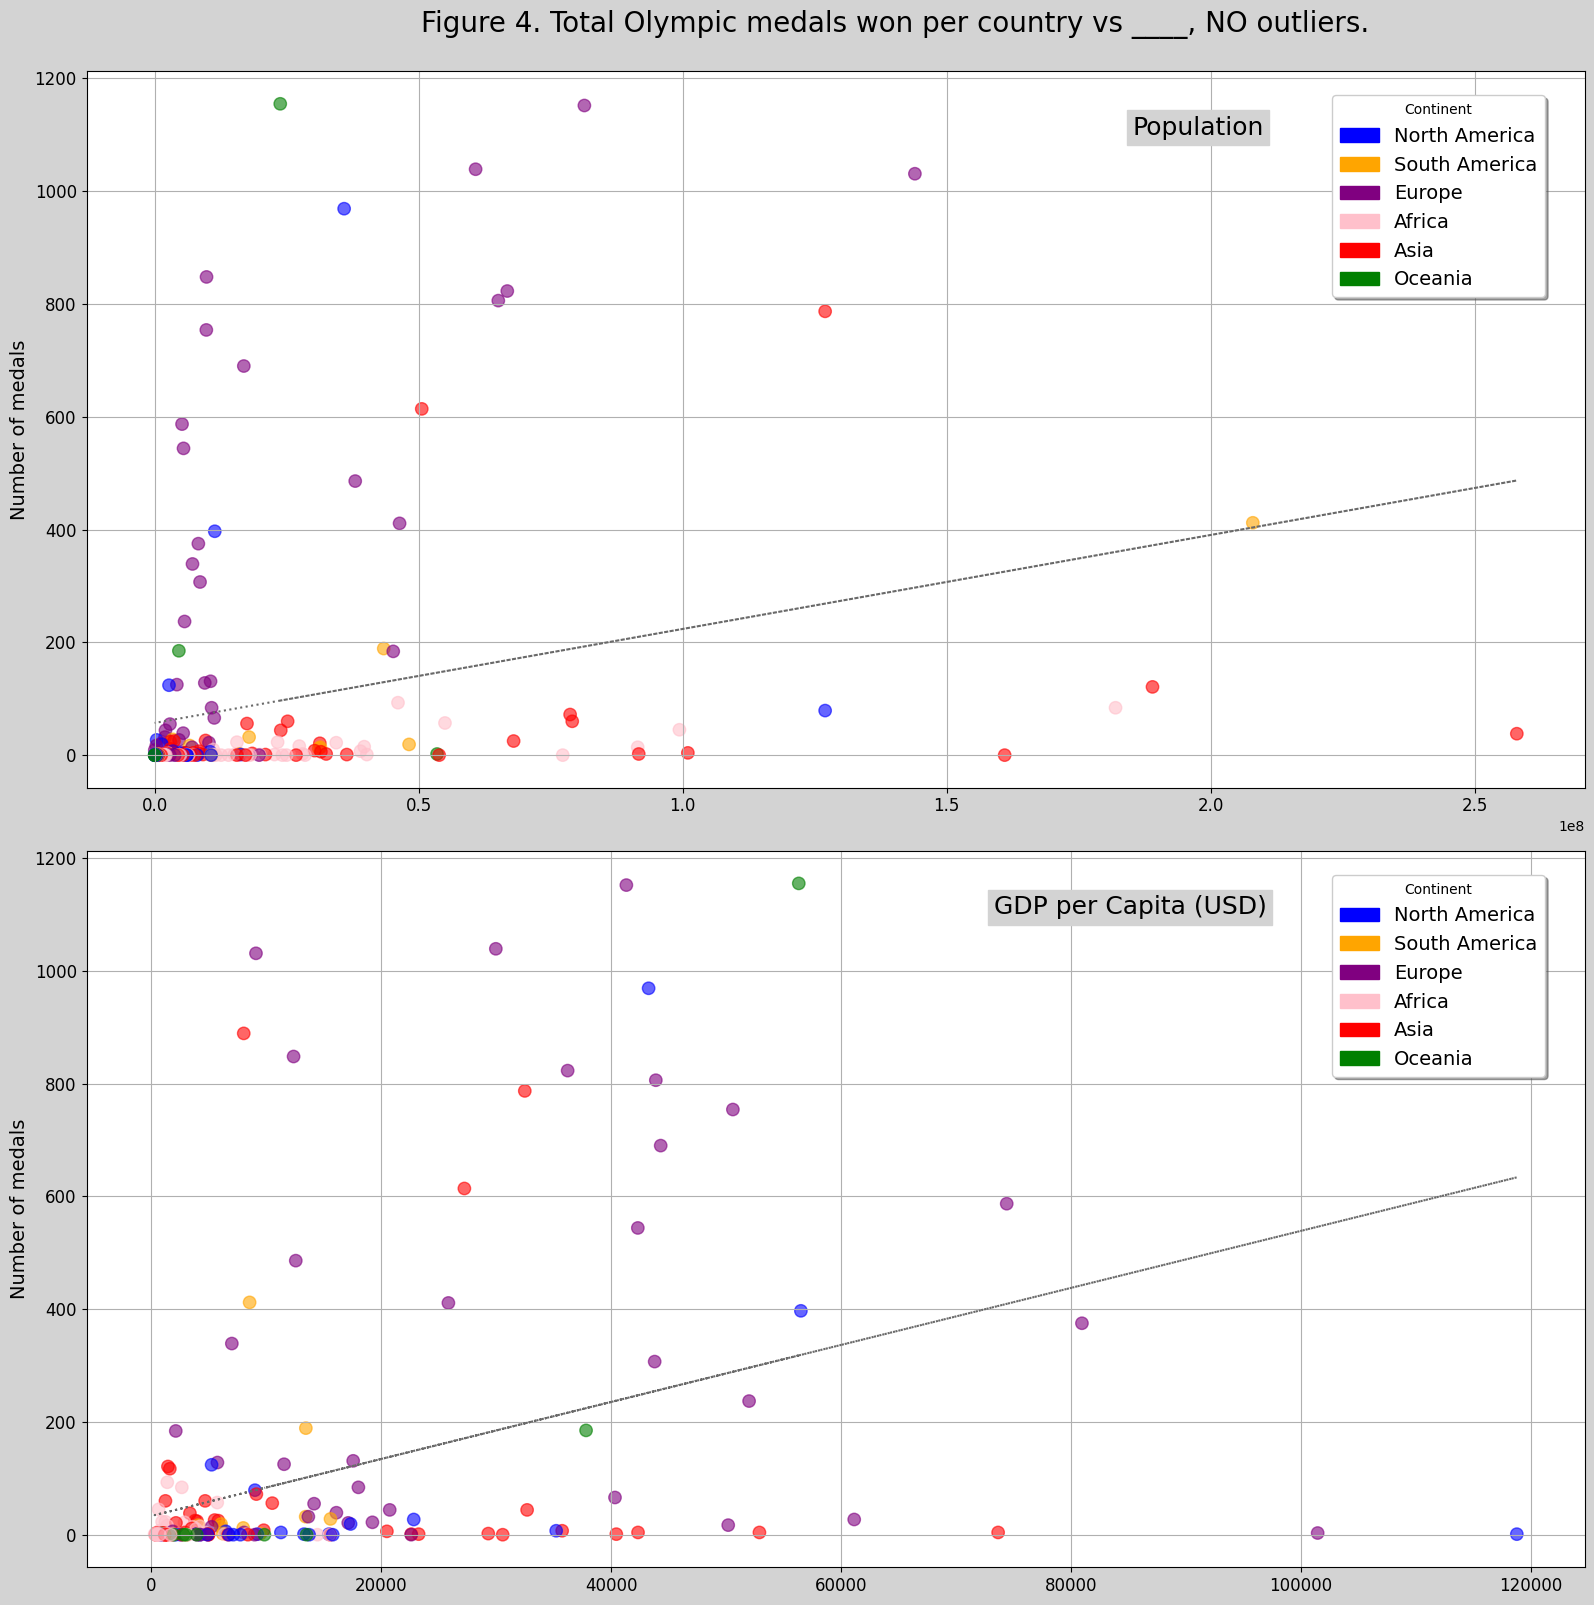

In [51]:
no_outliers_pop = country_olympics[(country_olympics['Code'] != 'USA') & (country_olympics['Code'] != 'CHN') & (country_olympics['Code'] != 'IND')]
no_outliers_gdp = country_olympics[(country_olympics['Code'] != 'USA') & (country_olympics['Code'] != 'LIE')]

fig = plt.figure(figsize=(18,16), facecolor='lightgray', tight_layout=True) 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Figure 4. Total Olympic medals won per country vs ____, NO outliers.', fontsize=20, y=1)


plt.subplot(2,1,1)
plt.scatter(no_outliers_pop['Population'], no_outliers_pop['Total medals'], c=no_outliers_pop['Color'], s=80, alpha=0.6)
#plt.title('Population & total medals')
plt.annotate('Population', (2.1e8, 1100), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.legend(handles=legend_handles, title='Continent', fontsize=14, shadow=True, bbox_to_anchor=(0.98,0.98))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
pop_fit = np.poly1d(np.polyfit(no_outliers_pop['Population'], no_outliers_pop['Total medals'], 1))
plt.plot(no_outliers_pop['Population'],pop_fit(no_outliers_pop['Population']),linestyle=":", color='dimgray')
plt.grid(True)
plt.ylabel('Number of medals', fontsize=14)

plt.subplot(2,1,2)
plt.scatter(no_outliers_gdp['GDP per Capita'], no_outliers_gdp['Total medals'], c=no_outliers_gdp['Color'], s=80, alpha=0.6)
plt.annotate('GDP per Capita (USD)', (97000, 1100), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.legend(handles=legend_handles, title='Continent', fontsize=14, shadow=True, bbox_to_anchor=(0.98,0.98))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
gdp_fit = np.poly1d(np.polyfit(no_outliers_gdp['GDP per Capita'], no_outliers_gdp['Total medals'], 1))
plt.plot(no_outliers_gdp['GDP per Capita'],gdp_fit(no_outliers_gdp['GDP per Capita']),linestyle=":", color='dimgray')
plt.grid(True)
plt.ylabel('Number of medals', fontsize=14)

plt.show()

### Comments on Fig. 4
* Without the outliers, it's much more easy to see the effect of GDP per Capita and Population
* Just as the previous section, we see much more variability in Europe's data points than in the other continents'.
* I added some trend lines to help us visualize better that there is a positive trend in both instances. However, I will not be quantifying how good of a trend it is here.
* As expected, there is a lot of variability between continents. Could we notice trends easier by splitting things up by continent?

In [28]:
# WITH THE USA
europe_gdp = country_olympics[country_olympics['Continent'] == 'EU']['GDP per Capita']
asia_gdp = country_olympics[country_olympics['Continent'] == 'AS']['GDP per Capita']
africa_gdp = country_olympics[country_olympics['Continent'] == 'AF']['GDP per Capita']
oceania_gdp = country_olympics[country_olympics['Continent'] == 'OC']['GDP per Capita']
north_america_gdp = country_olympics[country_olympics['Continent'] == 'NAm']['GDP per Capita']
south_america_gdp = country_olympics[country_olympics['Continent'] == 'SA']['GDP per Capita']

europe_pop = country_olympics[country_olympics['Continent'] == 'EU']['Population']
asia_pop = country_olympics[country_olympics['Continent'] == 'AS']['Population']
africa_pop = country_olympics[country_olympics['Continent'] == 'AF']['Population']
oceania_pop = country_olympics[country_olympics['Continent'] == 'OC']['Population']
north_america_pop = country_olympics[country_olympics['Continent'] == 'NAm']['Population']
south_america_pop = country_olympics[country_olympics['Continent'] == 'SA']['Population']

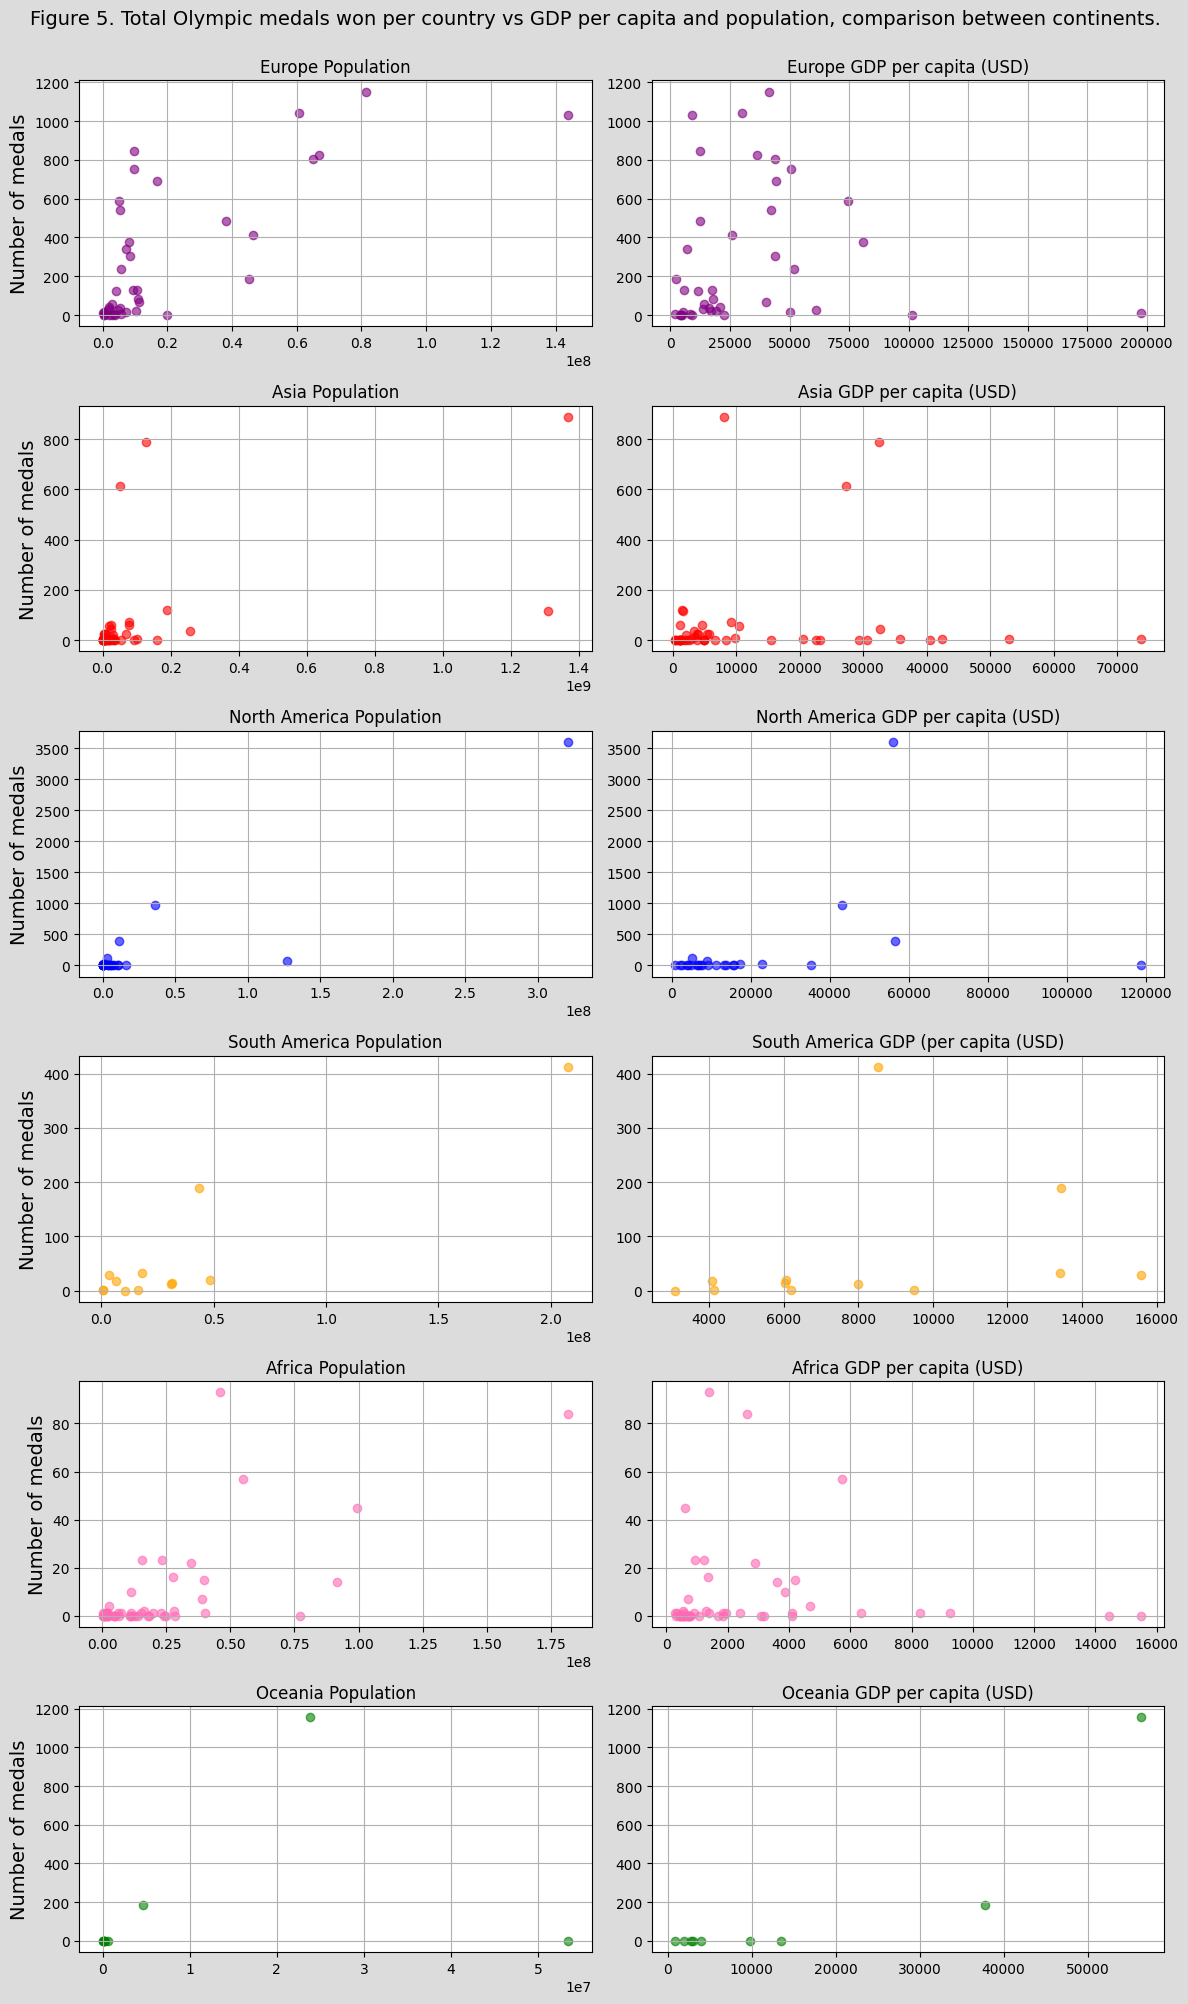

In [53]:
fig = plt.figure(figsize=(12,20), tight_layout=True, facecolor='gainsboro') 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Figure 5. Total Olympic medals won per country vs GDP per capita and population, comparison between continents.', fontsize=14, y=1)

plt.subplot(6,2,1)
plt.scatter(europe_pop, europe_medals, color='purple', alpha=0.6)
plt.title('Europe Population')
plt.ylabel('Number of medals', fontsize=14)
plt.grid(True)

plt.subplot(6,2,2)
plt.scatter(europe_gdp, europe_medals, color='purple', alpha=0.6)
plt.title('Europe GDP per capita (USD)')
plt.grid(True)

plt.subplot(6,2,3)
plt.scatter(asia_pop, asia_medals, color='red', alpha=0.6)
plt.title('Asia Population')
plt.ylabel('Number of medals', fontsize=14)
plt.grid(True)

plt.subplot(6,2,4)
plt.scatter(asia_gdp, asia_medals, color='red', alpha=0.6)
plt.title('Asia GDP per capita (USD)')
plt.grid(True)

plt.subplot(6,2,5)
plt.scatter(north_america_pop, north_america_medals, color='blue', alpha=0.6)
plt.title('North America Population')
plt.ylabel('Number of medals', fontsize=14)
plt.grid(True)

plt.subplot(6,2,6)
plt.scatter(north_america_gdp, north_america_medals, color='blue', alpha=0.6)
plt.title('North America GDP per capita (USD)')
plt.grid(True)

plt.subplot(6,2,7)
plt.scatter(south_america_pop, south_america_medals, color='orange', alpha=0.6)
plt.title('South America Population')
plt.ylabel('Number of medals', fontsize=14)
plt.grid(True)

plt.subplot(6,2,8)
plt.scatter(south_america_gdp, south_america_medals, color='orange', alpha=0.6)
plt.title('South America GDP (per capita (USD)')
plt.grid(True)

plt.subplot(6,2,9)
plt.scatter(africa_pop, africa_medals, color='hotpink', alpha=0.6)
plt.title('Africa Population')
plt.ylabel('Number of medals', fontsize=14)
plt.grid(True)

plt.subplot(6,2,10)
plt.scatter(africa_gdp, africa_medals, color='hotpink', alpha=0.6)
plt.title('Africa GDP per capita (USD)')
plt.grid(True)

plt.subplot(6,2,11)
plt.scatter(oceania_pop, oceania_medals, color='green', alpha=0.6)
plt.title('Oceania Population')
plt.ylabel('Number of medals', fontsize=14)
plt.grid(True)

plt.subplot(6,2,12)
plt.scatter(oceania_gdp, oceania_medals, color='green', alpha=0.6)
plt.title('Oceania GDP per capita (USD)')
plt.grid(True)


plt.show()

### Comments on Fig. 5
* Even if faint, we can see a positive correlation between the variables in all graphs.
* As expected, Europe has a lot of variability across the board.
* The US has an overwhelming presence in North America and somewhat obscures the trends of the other countries.
* Africa has way less medals per country than other continents.

### Hypothesis 7: The average GDP per capita of countries with more than 10 gold medals is higher than those with 10 or fewer gold medals. <span style="color:green">(supported)</span>
We clearly see a positive trend between GDP per capita and total medals worldwide in the plots above. I want to know just how much GDP can impact Olympic performance. What better way than gold medals? We can perform a 2-sample t-test here.\
\
**Null hypothesis:** The average GDP per capita of countries with more than 10 gold medals is comparable to those with 10 or fewer gold medals.\
**P-value for significance:** 0.05\
\
Let's start by making the datasets and checking the STDs ratio.

In [30]:
# more than 10 gold medals
top_world = country_olympics[country_olympics['Total gold'] > 10]
top_world_gdp = top_world['GDP per Capita']
top_world[['Country', 'Total gold']].head()

,Country,Total gold
0,United States,1638
1,Australia,304
2,Germany,415
3,Italy,323
4,Russia,333


In [31]:
# 10 or fewer
bottom_world = country_olympics[country_olympics['Total gold'] <= 10]
bottom_world_gdp = bottom_world['GDP per Capita']
bottom_world[['Country', 'Total gold']].head()

,Country,Total gold
43,Lithuania,6
45,Taiwan,3
46,Slovenia,7
48,Indonesia,9
49,Chile,3


In [32]:
print(f"\t\tMean GDP per Capita\tStandard deviation")
print(f">10 gold\t{np.mean(top_world_gdp)}\t{np.std(top_world_gdp)}")
print(f"<=10 gold\t{np.mean(bottom_world_gdp)}\t{np.std(bottom_world_gdp)}")

print(f"\nSTD ratio = {np.std(top_world_gdp)/np.std(bottom_world_gdp)}")

		Mean GDP per Capita	Standard deviation
>10 gold	23658.951091245835	21216.61401487733
<=10 gold	11510.798888836955	23509.645511797815

STD ratio = 0.9024642249169696


They are comparable! So we can now perform the test.

In [33]:
_, pval7 = ttest_ind(top_world_gdp,bottom_world_gdp)
print(f"Hypothesis 7 p-value: {pval7}")

Hypothesis 7 p-value: 0.0019481540801535011


**Results:** <ins>We reject the null hypothesis</ins>. The GDP per capita of the top gold medal winner countries is significantly higher than those of the other countries.

### Hypothesis 8: The average population of countries with more than 10 gold medals is the same than those that have won 10 or fewer gold medals. <span style="color:red">(rejected)</span>
While GDP had a big influence, I wouldn't expect population to have that much influence on winning gold medals. We run a new 2-sample t-test.\
\
**Null hypothesis:** The average population of countries with more than 10 gold medals is the same than those that have won 10 or fewer gold medals.\
**P-value for significance:** 0.05

In [34]:
top_world_pop = top_world['Population']
bottom_world_pop = bottom_world['Population']

In [35]:
print(f"\t\tMean Population\t\tStandard deviation")
print(f">10 gold\t{np.mean(top_world_pop)}\t{np.std(top_world_pop)}")
print(f"<=10 gold\t{np.mean(bottom_world_pop)}\t{np.std(bottom_world_pop)}")

print(f"\nSTD ratio = {np.std(top_world_pop)/np.std(bottom_world_pop)}")

		Mean Population		Standard deviation
>10 gold	106734333.33333333	265200530.47814384
<=10 gold	15815914.492753623	30564543.463579435

STD ratio = 8.67673782839765


They are comparable! So we can now perform the test.

In [36]:
_, pval8 = ttest_ind(top_world_pop,bottom_world_pop)
print(f"Hypothesis 8 p-value: {pval8}")

Hypothesis 8 p-value: 0.00011953964710655967


**Results:** <ins>We can reject the null hypothesis</ins>. The population of the top gold medal winner countries is significantly lower than those of the other countries. Surprising!\
\
Here, I didn't test for normality in the data distribution and I am concerned because of its composition. Fortunately, we can check our previous work with an additional test that does not assume normal distribution.

#### Running a Mann-Whitney U Test
Same null hypothesis and p-value for significance.

In [37]:
from scipy.stats import mannwhitneyu

_, pval8_2 = mannwhitneyu(top_world_pop, bottom_world_pop)
print(f'Mann-Whitney U test p-value: {pval8_2}')

Mann-Whitney U test p-value: 1.5405685596075026e-08


**Results:** <ins>We reject the null hypothesis</ins>. We get the same answer as before!\
What if we now want to quantify just how much of an influence is population?

#### Cohen's d test for determining effect size of the population

In [38]:
def cohens_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2)

d = cohens_d(top_world_pop, bottom_world_pop)
print(f"Cohen's d: {d}")

Cohen's d: 0.4766443359156413


**Results:** A Cohen's d of about 0.5 means that there is a medium effect size, meaning the two groups are different enough that the difference is noticeable but not dramatic. I.e., population alone does not fully explain the difference in gold medal counts, but it is a contributing factor.

***

## Average Medal Value Across Continents
To have a single metric to represent the proportion of gold, silver, and bronze medals that a country has won, we can create a medal value. This is computed by assigning 3 points to gold, 2 to silver, and 1 to bronze. We then divide this total medal value by the total mdeals to get an average medal value.

In [39]:
europe_avg_medal = country_olympics[country_olympics['Continent'] == 'EU']['Avg medal val']
asia_avg_medal = country_olympics[country_olympics['Continent'] == 'AS']['Avg medal val']
africa_avg_medal = country_olympics[country_olympics['Continent'] == 'AF']['Avg medal val']
oceania_avg_medal = country_olympics[country_olympics['Continent'] == 'OC']['Avg medal val']
north_america_avg_medal = country_olympics[country_olympics['Continent'] == 'NAm']['Avg medal val']
south_america_avg_medal = country_olympics[country_olympics['Continent'] == 'SA']['Avg medal val']

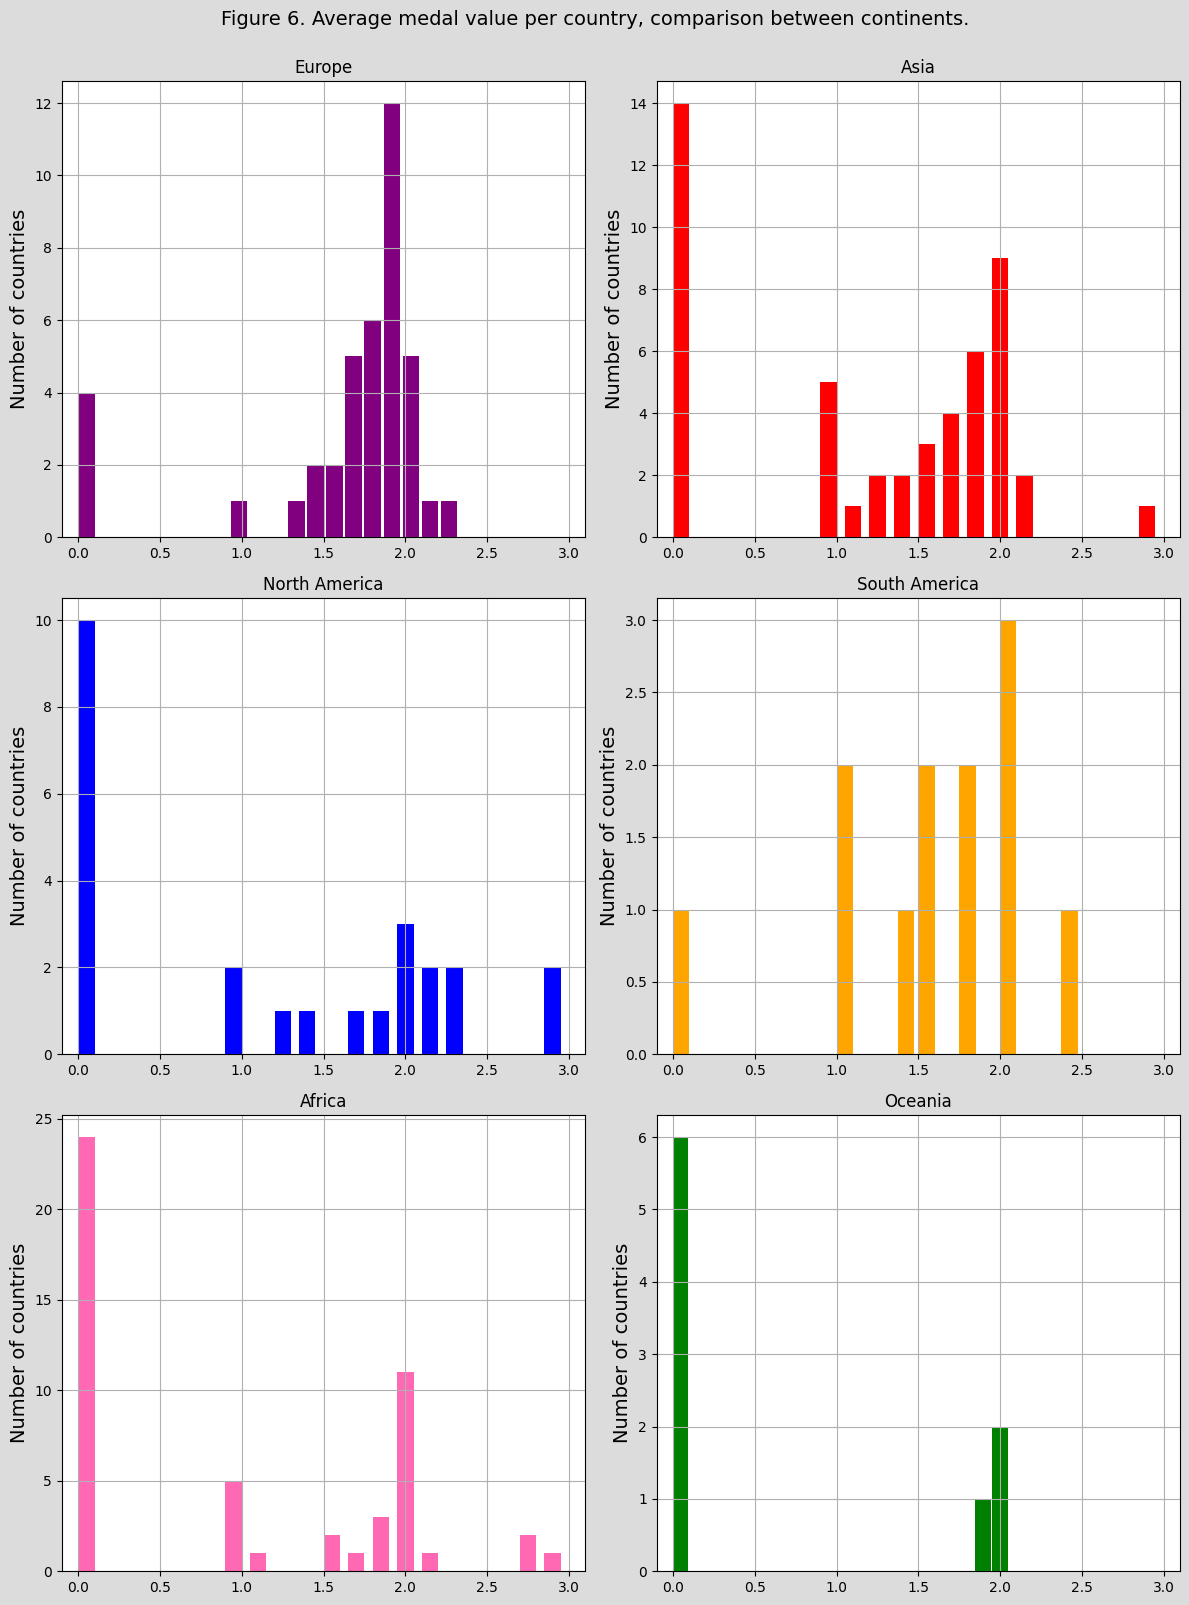

In [55]:
fig = plt.figure(figsize=(12,16), tight_layout=True, facecolor='gainsboro') 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Figure 6. Average medal value per country, comparison between continents.', fontsize=14, y=1)


plt.subplot(3,2,1)
plt.hist(europe_avg_medal, color='purple', width=0.1, bins=20)
plt.title('Europe')
plt.xlim(-0.1,3.1)
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,2)
plt.hist(asia_avg_medal, color='red', width=0.1, bins=20)
plt.title('Asia')
plt.xlim(-0.1,3.1)
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,3)
plt.hist(north_america_avg_medal, color='blue',width=0.1, bins=20)
plt.title('North America')
plt.xlim(-0.1,3.1)
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,4)
plt.hist(south_america_avg_medal, color='orange', width=0.1, bins=20)
plt.title('South America')
plt.xlim(-0.1,3.1)
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,5)
plt.hist(africa_avg_medal,color='hotpink', width=0.1, bins=20)
plt.title('Africa')
plt.xlim(-0.1,3.1)
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.subplot(3,2,6)
plt.hist(oceania_avg_medal, color='green', width=0.095, bins=20)
plt.title('Oceania')
plt.xlim(-0.1,3.1)
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.show()

### Comments on Fig. 6
* Europe and South America stand out with its mode being an average medal value close to 2.0 instead of 0.0 like other continents.
* If we ignore the lowest bar, Europe has a somewhat normal looking distribution that the other continents just do not have.
* Since this plot now ignores total medals, we can see that there is a more consistent performance across continents in terms of the medals won. 
* If we compare continental trends to the worldwide trend (below), we see very similar distributions.

In [41]:
world_avg_medal = country_olympics['Avg medal val']

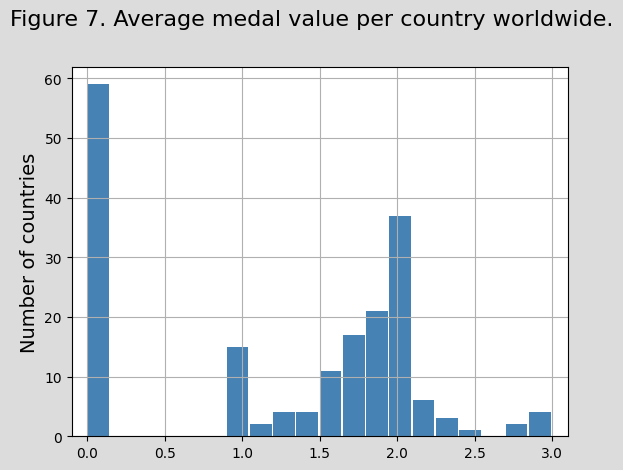

In [57]:
fig = plt.figure(facecolor='gainsboro') 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Figure 7. Average medal value per country worldwide.', fontsize=16, y=1)


plt.subplot(1,1,1)
plt.hist(world_avg_medal, color='steelblue', width=0.14, bins=20)
plt.xlim(-0.1,3.1)
plt.grid(True)
plt.ylabel('Number of countries', fontsize=14)

plt.show()

***

## Conclusions

### Key Findings

1. **Uneven Medal Distribution:** 
    * The Olympic medal distribution across countries is heavily skewed, with a small number of countries dominating the total medal count. This skewness is particularly evident in the case of the United States, which has won a disproportionately large number of medals, especially gold. 
    * The statistical tests confirmed that while the mean values of gold, silver, and bronze medal counts are not significantly different, the overall distribution of medals is far from uniform across countries and continents.


2. **Continental Differences:** 
    * Europe stands out as a continent with a significantly higher average number of medals per country compared to the worldwide average. This trend holds true even when considering different metrics like total medals and medals per capita.
    * The analysis also highlighted stark contrasts between continents, with Africa showing much lower medal counts on average, reflecting broader disparities in Olympic performance that align with economic and geopolitical factors.

3. **Economic and Population Influence:**
    * GDP per capita was found to have a significant impact on a country’s Olympic success, particularly in the context of gold medals. Countries with higher GDP per capita tend to win more gold medals, suggesting a strong correlation between economic power and Olympic performance.
    * Contrary to initial expectations, population size was an influential factor of Olympic success. Countries with smaller populations but higher GDP per capita often outperformed more populous nations in terms of gold medal counts.
    
4. **Medal Value Consistency:**
    * The average medal value, which considers the proportion of gold, silver, and bronze medals, showed more consistency across continents than total medal counts. This suggests that while some continents may win more medals overall, the quality (in terms of gold vs. other medals) is more evenly distributed.

### Implications and Limitations

* **Economic Disparities:** The results underscore the significant role of economic resources in determining Olympic success. I speculate that wealthier nations are better equipped to invest in sports infrastructure, training, and support systems, leading to better outcomes in international competitions.

* **Potential Biases:** The dataset does not account for the varying participation levels of countries in the Summer vs. Winter Olympics. Nor does it consider that some countries were founded before others, which could influence their medal counts over the selected time frame.

* **Further Research:** The project raises questions about the broader social, political, and economic factors that influence Olympic performance. Future research could explore these connections in greater detail, perhaps by integrating additional datasets or employing more sophisticated statistical models.

### Reflection

This project helped reveal valuable insights into the global trends in Olympic performance that I was not aware of before, while also offering me a practical opportunity to apply data analysis techniques. The statistical tests, while sometimes inconclusive, helped to quantify observations and provided a deeper understanding of the complex factors driving Olympic success, beyond simple observations.